In [1]:
from CAModel import *
import os
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 20)
sorted(os.listdir("output"))

['cbd.tif',
 'cbd_dist.tif',
 'dem.tif',
 'land_use_1996.tif',
 'land_use_2001.tif',
 'land_use_2008.tif',
 'land_use_2012.tif',
 'land_use_2018.tif',
 'mway.tif',
 'mway_dist.tif',
 'pop_1996.tif',
 'pop_2001.tif',
 'pop_2006.tif',
 'pop_2013.tif',
 'pop_2018.tif',
 'pop_2023.tif',
 'pop_2028.tif',
 'pop_2033.tif',
 'pop_2038.tif',
 'pop_2043.tif',
 'pop_2048.tif',
 'slope.tif']

In [2]:
# Create a land cover class which takes land cover data for two time periods
# Use 2008-2012 to predict 2018
myLandcover = landcover("output/land_use_2008.tif", "output/land_use_2012.tif")

# Create a factors class that configures all the factors for the model
myFactors = growthFactors("output/cbd_dist.tif", "output/mway_dist.tif", "output/pop_2018.tif", "output/slope.tif")

# Initiate the model with the above created class
caModel = fitmodel(myLandcover, myFactors)

# Set the threshold values, Assign negative threshold values if less than rule is required
# Based on the statistical and spatial accuracy displayed, the thresholds should be tweaked
caModel.setThreshold(3, -15000, -10000, 8000, -3)

# Run the model
caModel.predict()

# Check the accuracy of the predicted values
caModel.checkAccuracy()

# Export the predicted layer
os.makedirs("predictions", exist_ok=True)
caModel.exportPredicted('predictions/land_use_2018.tif')

Checking the size of input rasters...
Land cover data size matched.

Checking feature classes in land cover data...
The classes in input land cover files are matched.

Checking the size of input growth factors...
Input factors have same row and column value.

Matching the size of land cover and growth factors...
Size of rasters matched.

Threshold set for factors
Row: 500, Col: 500, Builtup cells count: 0
Row: 1000, Col: 500, Builtup cells count: 0
Actual growth: 5, Predicted growth: 82
Spatial accuracy: 84.446986


In [3]:
# Use 2012-2018 to predict 2023
myLandcover = landcover("output/land_use_2012.tif", "output/land_use_2018.tif")

# Create a factors class that configures all the factors for the model
myFactors = growthFactors("output/cbd_dist.tif", "output/mway_dist.tif", "output/pop_2023.tif", "output/slope.tif")

# Initiate the model with the above created class
caModel = fitmodel(myLandcover, myFactors)

# Set the threshold values, Assign negative threshold values if less than rule is required
# Based on the statistical and spatial accuracy displayed, the thresholds should be tweaked
caModel.setThreshold(3, -15000, -10000, 8000, -3)

# Run the model
caModel.predict(base=2)

# Export the predicted layer
outfile = 'predictions/land_use_2023.tif'
caModel.exportPredicted(outfile)

Checking the size of input rasters...
Land cover data size matched.

Checking feature classes in land cover data...
The classes in input land cover files are matched.

Checking the size of input growth factors...
Input factors have same row and column value.

Matching the size of land cover and growth factors...
Size of rasters matched.

Threshold set for factors
Row: 500, Col: 500, Builtup cells count: 0
Row: 1000, Col: 500, Builtup cells count: 0


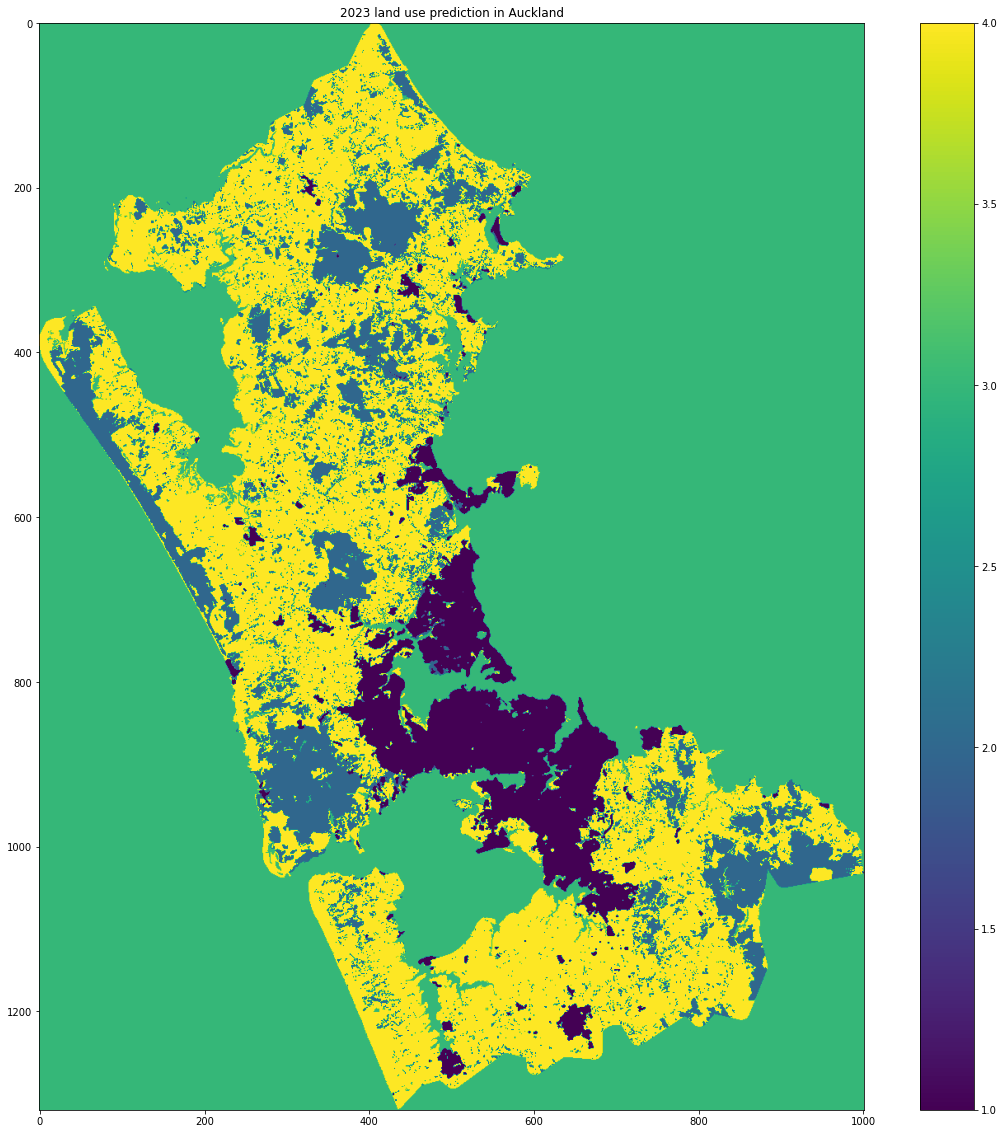

In [4]:
plt.imshow(caModel.predicted)
plt.title("2023 land use prediction in Auckland")
plt.colorbar()